In [1]:
%matplotlib inline
import math, keras, datetime, pandas as pd, numpy as np, keras.backend as K
import matplotlib.pyplot as plt, xgboost, operator, random, pickle
from utils2 import *
from isoweek import Week
from pandas_summary import DataFrameSummary
# Convert to input compatible with neural network
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from datetime import datetime as dt
from datetime import timedelta
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import ast
from shapely.geometry import Point
%cd yelp_dataset/

Using TensorFlow backend.
/home/an/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/home/an/Dropbox/deep_learning_project/yelp_dataset


/home/an/tensorflow/lib/python3.5/site-packages/pysal/contrib/viz/mapping.py:33: UserWarning: Bokeh not installed. Functionality related to it will not work
  warn('Bokeh not installed. Functionality ' \


In [2]:
np.set_printoptions(threshold=50, edgeitems=20)
# tell keras not to use allocate everything to computation
limit_mem()

# read in the business characteristics
business_df = pd.read_csv("business.csv")

In [3]:
# fill boolean missing value with 9
business_df.rename(columns={"attributes.BestNights.sunday":"best_sunday"},inplace=True)
business_df.best_sunday=business_df.best_sunday.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.classy":"amb_classy"},inplace=True)
business_df.amb_classy = business_df.amb_classy.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessParking.lot":"parking"},inplace=True)
business_df.parking = business_df.parking.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HappyHour":"happyhour"},inplace=True)
business_df.happyhour = business_df.happyhour.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.kids":"hair_kid"},inplace=True)
business_df.hair_kid = business_df.hair_kid.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.perms":"hair_perm"},inplace=True)
business_df.hair_perm = business_df.hair_perm.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.RestaurantsTakeOut":"takeout"},inplace=True)
business_df.takeout = business_df.takeout.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.romantic":"amb_romantic"},inplace=True)
business_df.amb_romantic = business_df.amb_romantic.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.dj":"music_dj"},inplace=True)
business_df.music_dj = business_df.music_dj.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BestNights.friday":"best_friday"},inplace=True)
business_df.best_friday = business_df.best_friday.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.OutdoorSeating":"outdoor_seat"},inplace=True)
business_df.outdoor_seat = business_df.outdoor_seat.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForMeal.dinner":"good_dinner"},inplace=True)
business_df.good_dinner = business_df.good_dinner.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessParking.valet":"park_valet"},inplace=True)
business_df.park_valet = business_df.park_valet.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessAcceptsCreditCards":"credit_card"},inplace=True)
business_df.credit_card = business_df.credit_card.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.ByAppointmentOnly":"appointment"},inplace=True)
business_df.appointment = business_df.appointment.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.video":"music_video"},inplace=True)
business_df.music_video = business_df.music_video.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HasTV":"tv"},inplace=True)
business_df.tv = business_df.tv.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BestNights.monday":"best_mon"},inplace=True)
business_df.best_mon = business_df.best_mon.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.RestaurantsDelivery":"delivery"},inplace=True)
business_df.delivery = business_df.delivery.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.divey":"amb_divey"},inplace=True)
business_df.amb_divey = business_df.amb_divey.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.live":"music_live"},inplace=True)
business_df.music_live = business_df.music_live.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.touristy":"amb_tourist"},inplace=True)
business_df.amb_tourist = business_df.amb_tourist.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForMeal.lunch":"good_lunch"},inplace=True)
business_df.good_lunch = business_df.good_lunch.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.background_music":"music_background"},inplace=True)
business_df.music_background = business_df.music_background.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForKids":"good_kid"},inplace=True)
business_df.good_kid = business_df.good_kid.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.dairy-free":"dairy_free"},inplace=True)
business_df.dairy_free = business_df.dairy_free.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.curly":"hair_curly"},inplace=True)
business_df.hair_curly = business_df.hair_curly.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.WheelchairAccessible":"wheelchair"},inplace=True)
business_df.wheelchair = business_df.wheelchair.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.jukebox":"music_jukebox"},inplace=True)
business_df.music_jukebox = business_df.music_jukebox.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.soy-free":"soy_free"},inplace=True)
business_df.soy_free = business_df.soy_free.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.AcceptsInsurance":"insurance"},inplace=True)
business_df.insurance = business_df.insurance.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DogsAllowed":"dog_ok"},inplace=True)
business_df.dog_ok = business_df.dog_ok.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BestNights.saturday":"best_sat"},inplace=True)
business_df.best_sat = business_df.best_sat.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.karaoke":"music_karaoke"},inplace=True)
business_df.music_karaoke = business_df.music_karaoke.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Open24Hours":"open_24hr"},inplace=True)
business_df.open_24hr = business_df.open_24hr.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessAcceptsBitcoin":"bitcoin"},inplace=True)
business_df.bitcoin = business_df.bitcoin.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.vegetarian":"vegetarian"},inplace=True)
business_df.vegetarian = business_df.vegetarian.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessParking.street":"parking_street"},inplace=True)
business_df.parking_street = business_df.parking_street.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.upscale":"amb_upscale"},inplace=True)
business_df.amb_upscale = business_df.amb_upscale.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Caters":"caters"},inplace=True)
business_df.caters = business_df.caters.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.RestaurantsCounterService":"restaurant_counter"},inplace=True)
business_df.restaurant_counter = business_df.restaurant_counter.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.intimate":"amb_intimate"},inplace=True)
business_df.amb_intimate = business_df.amb_intimate.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BikeParking":"parking_bike"},inplace=True)
business_df.parking_bike = business_df.parking_bike.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BYOB":"byob"},inplace=True)
business_df.byob = business_df.byob.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Music.no_music":"music_no"},inplace=True)
business_df.music_no = business_df.music_no.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForMeal.breakfast":"good_breakfast"},inplace=True)
business_df.good_breakfast = business_df.good_breakfast.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.hipster":"amb_hipster"},inplace=True)
business_df.amb_hipster = business_df.amb_hipster.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.straightperms":"hair_straightperm"},inplace=True)
business_df.hair_straightperm = business_df.hair_straightperm.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BestNights.tuesday":"best_tue"},inplace=True)
business_df.best_tue = business_df.best_tue.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.RestaurantsReservations":"restaurant_reservation"},inplace=True)
business_df.restaurant_reservation = business_df.restaurant_reservation.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.coloring":"hair_coloring"},inplace=True)
business_df.hair_coloring = business_df.hair_coloring.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.kosher":"kosher"},inplace=True)
business_df.kosher = business_df.kosher.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessParking.garage":"parking_garage"},inplace=True)
business_df.parking_garage = business_df.parking_garage.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BestNights.wednesday":"best_wed"},inplace=True)
business_df.best_wed = business_df.best_wed.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BusinessParking.validated":"parking_validated"},inplace=True)
business_df.parking_validated = business_df.parking_validated.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.extensions":"hair_extension"},inplace=True)
business_df.hair_extension = business_df.hair_extension.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.CoatCheck":"coatcheck"},inplace=True)
business_df.coatcheck = business_df.coatcheck.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForMeal.dessert":"good_dessert"},inplace=True)
business_df.good_dessert = business_df.good_dessert.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.halal":"halal"},inplace=True)
business_df.halal = business_df.halal.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.gluten-free":"glutten_free"},inplace=True)
business_df.glutten_free = business_df.glutten_free.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DriveThru":"drivethru"},inplace=True)
business_df.drivethru = business_df.drivethru.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.asian":"hair_asian"},inplace=True)
business_df.hair_asian = business_df.hair_asian.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.RestaurantsTableService":"table_service"},inplace=True)
business_df.table_service = business_df.table_service.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.RestaurantsGoodForGroups":"restaurant_group"},inplace=True)
business_df.restaurant_group = business_df.restaurant_group.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.trendy":"amb_trendy"},inplace=True)
business_df.amb_trendy = business_df.amb_trendy.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.DietaryRestrictions.vegan":"vegan"},inplace=True)
business_df.vegan = business_df.vegan.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Ambience.casual":"amb_casual"},inplace=True)
business_df.amb_casual = business_df.amb_casual.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.Corkage":"corkage"},inplace=True)
business_df.corkage = business_df.corkage.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForMeal.latenight":"good_latenight"},inplace=True)
business_df.good_latenight = business_df.good_latenight.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.HairSpecializesIn.africanamerican":"hair_african"},inplace=True)
business_df.hair_african = business_df.hair_african.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForMeal.brunch":"good_brunch"},inplace=True)
business_df.good_brunch = business_df.good_brunch.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.GoodForDancing":"good_dancing"},inplace=True)
business_df.good_dancing = business_df.good_dancing.fillna(999).astype(np.int32)
business_df.rename(columns={"attributes.BestNights.thursday":"best_thur"},inplace=True)
business_df.best_thur = business_df.best_thur.fillna(999).astype(np.int32)

In [4]:
def extract_hour(string="nan"):
    if string != "nan":
        temp = string.split("-")
        op = dt.strptime(temp[0].split("'")[1],"%H:%M")
        cls = dt.strptime(temp[1].split("'")[0],"%H:%M")
        if cls < op:
            cls +=timedelta(hours=24)
        op_duration = (cls - op)
        return op, cls, op_duration
    else:
        return dt.strptime("1:00","%H:%M"), dt.strptime("1:00","%H:%M"), timedelta(hours=0)
def get_col_hour(df_name,col_name,new_name):
    df_name[col_name] = df_name[col_name].astype(str)
    df_name["op_hour_"+str(new_name)] = df_name[col_name].apply(lambda x: extract_hour(x)[0])
    df_name["close_hour_"+str(new_name)] = df_name[col_name].apply(lambda x: extract_hour(x)[1])
    df_name["op_duration_"+str(new_name)] = df_name[col_name].apply(lambda x: extract_hour(x)[2])
    df_name.drop(col_name,axis=1,inplace=True)

# processing opening and closing hour
get_col_hour(business_df,"hours.Thursday","thur")
get_col_hour(business_df,"hours.Wednesday","wed")
get_col_hour(business_df,"hours.Sunday","sun")
get_col_hour(business_df,"hours.Friday","fri")
get_col_hour(business_df,"hours.Tuesday","tue")
get_col_hour(business_df,"hours.Monday","mon")
get_col_hour(business_df,"hours.Saturday","sat")

In [5]:
# if have longitude and latitude, already have full info on the geographical location of business
business_df.drop("address",axis=1,inplace=True)
business_df.drop("postal_code",axis=1,inplace=True)
business_df.drop("neighborhood",axis=1,inplace=True)
business_df.drop("city",axis=1,inplace=True)
# business_id: not use now but is used to merge with other dataset
business_df.rename(columns={"attributes.Alcohol":"alcohol"},inplace=True)
business_df.alcohol = business_df.alcohol.fillna("").astype(str)
business_df.rename(columns={"attributes.AgesAllowed":"age_allowed"},inplace=True)
business_df.age_allowed = business_df.age_allowed.fillna("").astype(str)
business_df.rename(columns={"attributes.RestaurantsPriceRange2":"price_range"},inplace=True)
business_df.price_range = business_df.price_range.fillna(0).astype(np.int32)
business_df.rename(columns={"attributes.Smoking":"smoking"},inplace=True)
business_df.smoking = business_df.smoking.fillna("").astype(str)
business_df.rename(columns={"attributes.RestaurantsPriceRange2":"price_range"},inplace=True)
business_df.price_range = business_df.price_range.fillna(0).astype(np.int32)
business_df.rename(columns={"attributes.WiFi":"wifi"},inplace=True)
business_df.wifi = business_df.wifi.fillna("").astype(str)
business_df.rename(columns={"attributes.BYOBCorkage":"byob_corkage"},inplace=True)
business_df.byob_corkage = business_df.byob_corkage.fillna("").astype(str)
business_df.rename(columns={"attributes.RestaurantsAttire":"attire"},inplace=True)
business_df.attire = business_df.attire.fillna("").astype(str)
business_df.rename(columns={"attributes.NoiseLevel":"noise"},inplace=True)
business_df.noise = business_df.noise.fillna("").astype(str)
# re-categorize business into big categories: use bag of word to list top frequency word

In [6]:
list(business_df)

['best_sunday',
 'amb_classy',
 'parking',
 'happyhour',
 'hair_kid',
 'hair_perm',
 'takeout',
 'amb_romantic',
 'music_dj',
 'best_friday',
 'outdoor_seat',
 'good_dinner',
 'business_id',
 'park_valet',
 'credit_card',
 'alcohol',
 'appointment',
 'age_allowed',
 'music_video',
 'tv',
 'best_mon',
 'delivery',
 'amb_divey',
 'music_live',
 'latitude',
 'amb_tourist',
 'good_lunch',
 'price_range',
 'is_open',
 'music_background',
 'good_kid',
 'dairy_free',
 'hair_curly',
 'wheelchair',
 'music_jukebox',
 'soy_free',
 'insurance',
 'dog_ok',
 'best_sat',
 'music_karaoke',
 'open_24hr',
 'bitcoin',
 'vegetarian',
 'smoking',
 'parking_street',
 'amb_upscale',
 'caters',
 'restaurant_counter',
 'categories',
 'amb_intimate',
 'parking_bike',
 'byob',
 'music_no',
 'good_breakfast',
 'amb_hipster',
 'hair_straightperm',
 'best_tue',
 'restaurant_reservation',
 'hair_coloring',
 'kosher',
 'byob_corkage',
 'parking_garage',
 'wifi',
 'best_wed',
 'parking_validated',
 'review_count',
 '

In [7]:
def new_cat(lst,lst_cat_or, lst_cat_sub=None):
    for i in lst_cat_or:
        if i in lst:
            if lst_cat_sub:
                for j in lst_cat_sub:
                    if j in lst:
                        return True
                return False
            else:
                return True
    return False

In [8]:
# this seems to not work well, all value are False
business_df["food"] = business_df["categories"].apply(lambda x: new_cat(x,["Restaurants","Food"]))

business_df["food_us"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Fast Food', 'American (Traditional)','Burgers', 
                                                'American (New)', 'Chicken Wings', 'Barbeque', 'Donuts']))
business_df["food_europe"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Pizza', 'Italian', 'Mediterranean', 'Greek', 'French']))

business_df["food_mexican"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Mexican']))

business_df["food_chinese"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Chinese']))

business_df["food_jpn"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Japanese', 'Sushi Bars']))

business_df["food_asian"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Asian Fusion', 'Thai', 'Indian', 'Vietnamese', 'Korean']))

business_df["food_coffee"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Bakeries', 'Sandwiches','Cafes', 'Coffee & Tea']))

business_df["food_seafood"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Seafood']))

business_df["food_ethnic"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Middle Eastern', 'Ethnic Food']))

business_df["food_health"] = business_df["categories"].apply(
    lambda x: new_cat(x,["Restaurants","Food"],['Specialty Food', 'Ice Cream & Frozen Yogurt', 'Salad', 
                                                'Juice Bars & Smoothies', 'Vegetarian', 'Gluten-Free', 'Vegan']))

business_df["bar"] = business_df["categories"].apply(lambda x: new_cat(x,['Bars','Pubs', 'Nightlife']))

business_df["hotel"] = business_df["categories"].apply(lambda x: new_cat(x,['Hotels & Travel','Hotels']))
business_df["grocery"] = business_df["categories"].apply(lambda x: new_cat(x,['Grocery']))
business_df["shopping"] = business_df["categories"].apply(lambda x: new_cat(x,['Shopping','Fashion','Department Stores']))
business_df["pet"] = business_df["categories"].apply(lambda x: new_cat(x,['Pets']))
business_df["hair_salon"] = business_df["categories"].apply(lambda x: new_cat(x,['Hair Salons']))
business_df["beauty_spa"] = business_df["categories"].apply(lambda x: new_cat(x,['Beauty & Spas']))
business_df["health"] = business_df["categories"].apply(lambda x: new_cat(x,['Health & Medical']))
business_df["home_service"] = business_df["categories"].apply(lambda x: new_cat(x,['Home Services']))
business_df["local_service"] = business_df["categories"].apply(lambda x: new_cat(x,['Local Services']))
business_df["prof_service"] = business_df["categories"].apply(lambda x: new_cat(x,['Professional Services']))

business_df.drop("categories",axis=1,inplace=True)
business_df.dropna(axis=0,how="any",inplace=True)

In [9]:
pd.crosstab(index=business_df.stars,columns="count")

col_0,count
stars,
1.0,2733
1.5,3516
2.0,8331
2.5,13730
3.0,21814
3.5,28610
4.0,31529
4.5,22557
5.0,23818


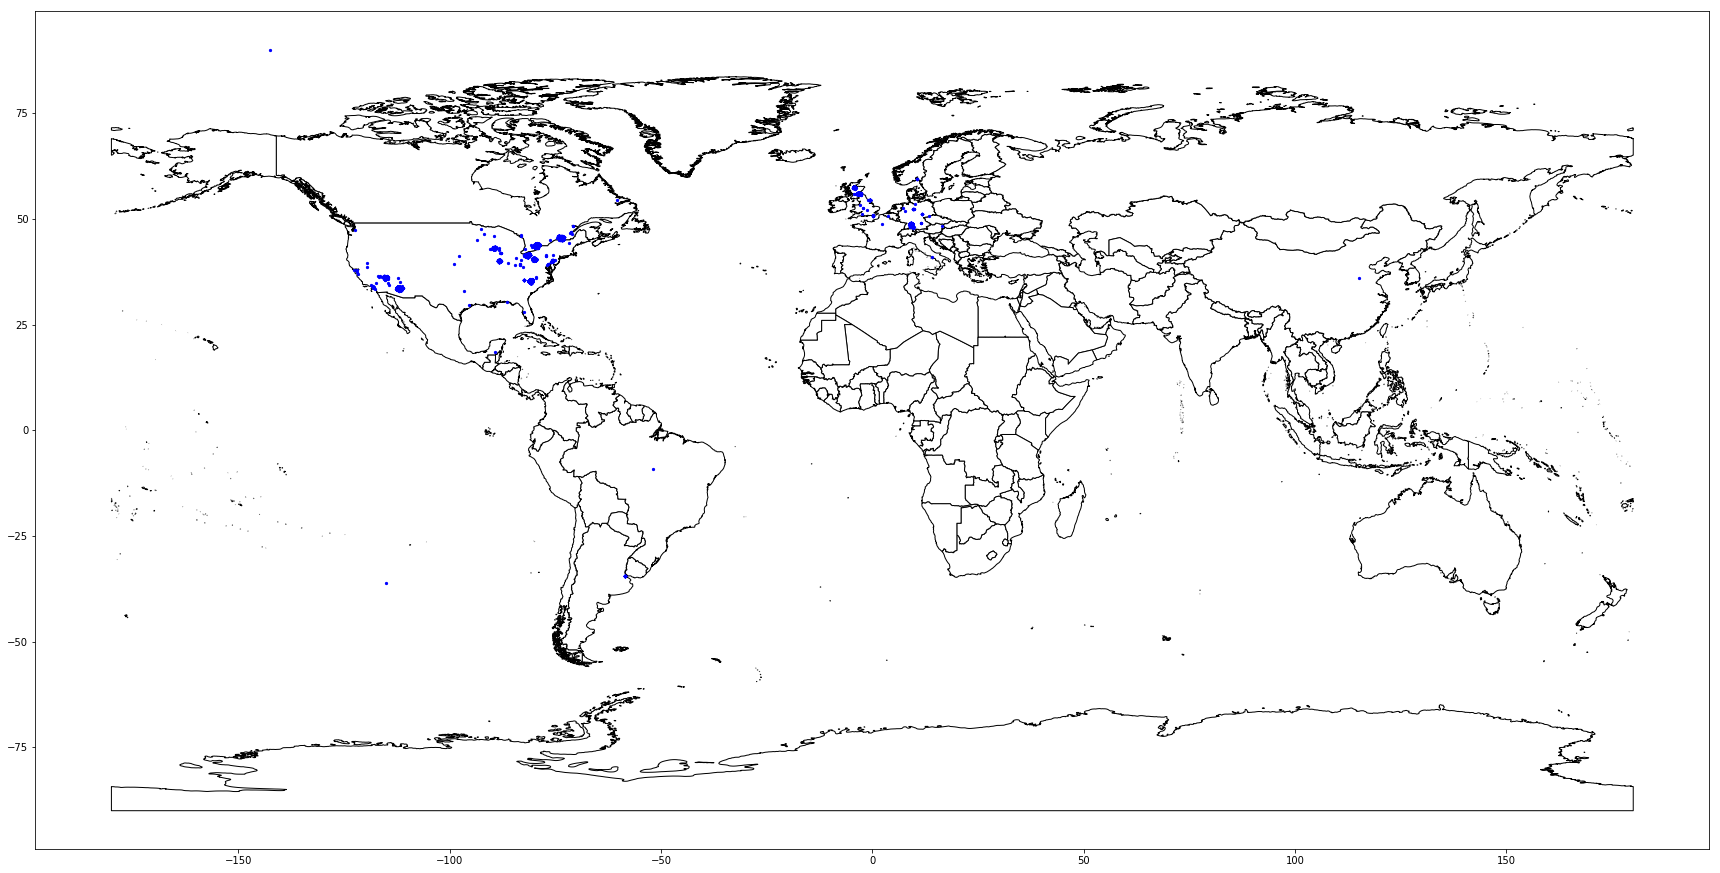

In [10]:
# Process geographical information
# Rely only on latitude and longitude only -> drop city, neighborhood, and other gegraphical related variable
# Identify the 12 metropolitan areas and 4 countries
# Identify close competitors
# First, map out the location of all the business on the world map
#remember to always ensure they share a common CRS
world_map = gpd.read_file("TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp")
business_map = business_df[['latitude',"longitude",'business_id']]
geometry = [Point(xy) for xy in zip(business_map.longitude, business_map.latitude)]
business_map = business_map.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
business_map = gpd.GeoDataFrame(business_map, crs=crs, geometry=geometry)
business_map = business_map.to_crs(world_map.crs)

fig, ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')
world_map.plot(ax=ax, color='white', edgecolor='black')
business_map.plot(ax=ax, marker='o', color='blue', markersize=5)
fig.savefig("world_location.png")
plt.show()

In [11]:
merging = gpd.sjoin(business_map, world_map, how="left", op="within")
merging.drop(["UN","AREA","REGION","SUBREGION","LAT","LON","index_right","FIPS","ISO2", "NAME"],axis=1,inplace=True)
merging.head()

,business_id,geometry,ISO3,POP2005
0,b'YDf95gJZaq05wvo7hTQbbQ',POINT (-81.4931165 41.5417162),USA,299846449.0
1,b'mLwM-h2YhXl2NCgdS84_Bw',POINT (-80.74197590000001 35.23687),USA,299846449.0
2,b'v2WhjAB3PIBA8J8VxG3wEg',POINT (-79.3532848 43.6771258),CAN,32270507.0
3,b'CVtCbSB1zUcUWg-9TNGTuQ',POINT (-111.9164003 33.5650816),USA,299846449.0
4,b'duHFBe87uNSXImQmvBh87Q',POINT (-112.0388474 33.5059283),USA,299846449.0


In [12]:
business_df = pd.merge(business_df,merging,on="business_id")
business_df.rename(columns={"ISO3":"country"},inplace=True)
business_df.country.unique()

array(['USA', 'CAN', 'GBR', 'DEU', nan, 'ARG', 'FRA', 'MEX', 'BEL', 'NOR',
       'ITA', 'BRA', 'AUT', 'CHN'], dtype=object)

In [13]:
# only keep data for the 4 main countries
pd.crosstab(index=business_df.country,columns="count")

col_0,count
country,
ARG,32
AUT,1
BEL,1
BRA,1
CAN,33790
CHN,1
DEU,3098
FRA,1
GBR,3718


In [14]:
business_df=business_df.loc[(business_df.country=="CAN") | (business_df.country=="DEU") |(business_df.country=="GBR") | (business_df.country=="USA")]
pd.crosstab(index=business_df.country,columns="count")

col_0,count
country,
CAN,33790
DEU,3098
GBR,3718
USA,115557


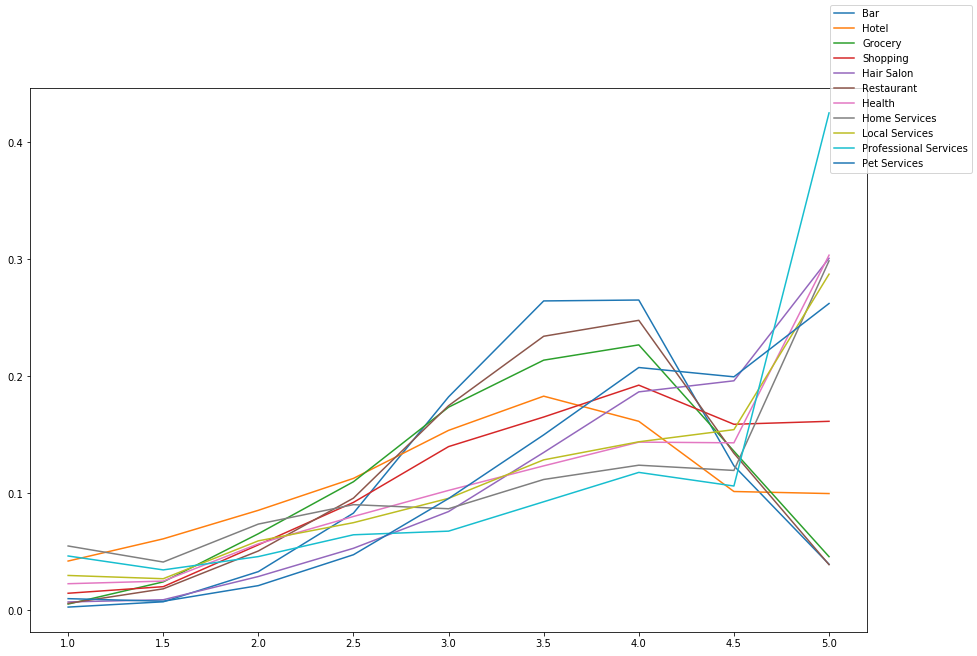

In [15]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(pd.crosstab(columns=business_df.bar,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Bar")
ax.plot(pd.crosstab(columns=business_df.hotel,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Hotel")
ax.plot(pd.crosstab(columns=business_df.grocery,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Grocery")
ax.plot(pd.crosstab(columns=business_df.shopping,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Shopping")
ax.plot(pd.crosstab(columns=business_df.hair_salon,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Hair Salon")
ax.plot(pd.crosstab(columns=business_df.food,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Restaurant")
ax.plot(pd.crosstab(columns=business_df.health,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Health")
ax.plot(pd.crosstab(columns=business_df.home_service,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Home Services")
ax.plot(pd.crosstab(columns=business_df.local_service,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Local Services")
ax.plot(pd.crosstab(columns=business_df.prof_service,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Professional Services")
ax.plot(pd.crosstab(columns=business_df.pet,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Pet Services")
fig.legend(loc='upper right')
fig.savefig("star_dis_cat.png")
plt.show()

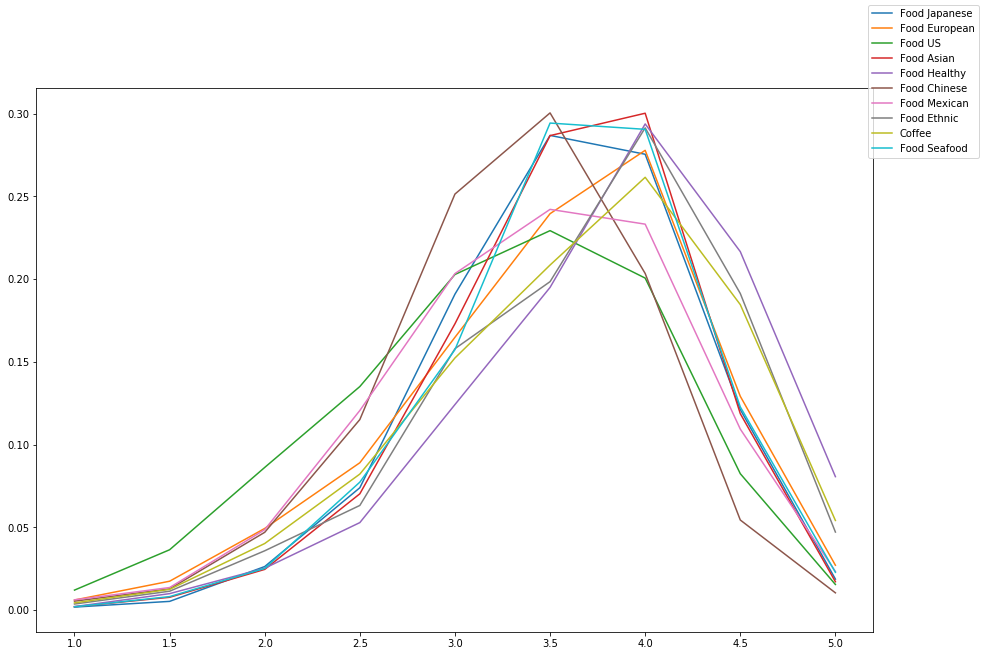

In [16]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(pd.crosstab(columns=business_df.food_jpn,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Japanese")
ax.plot(pd.crosstab(columns=business_df.food_europe,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food European")
ax.plot(pd.crosstab(columns=business_df.food_us,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food US")
ax.plot(pd.crosstab(columns=business_df.food_asian,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Asian")
ax.plot(pd.crosstab(columns=business_df.food_health,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Healthy")
ax.plot(pd.crosstab(columns=business_df.food_chinese,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Chinese")
ax.plot(pd.crosstab(columns=business_df.food_mexican,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Mexican")
ax.plot(pd.crosstab(columns=business_df.food_ethnic,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Ethnic")
ax.plot(pd.crosstab(columns=business_df.food_coffee,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Coffee")
ax.plot(pd.crosstab(columns=business_df.food_seafood,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Food Seafood")
fig.legend(loc='upper right')
plt.show()

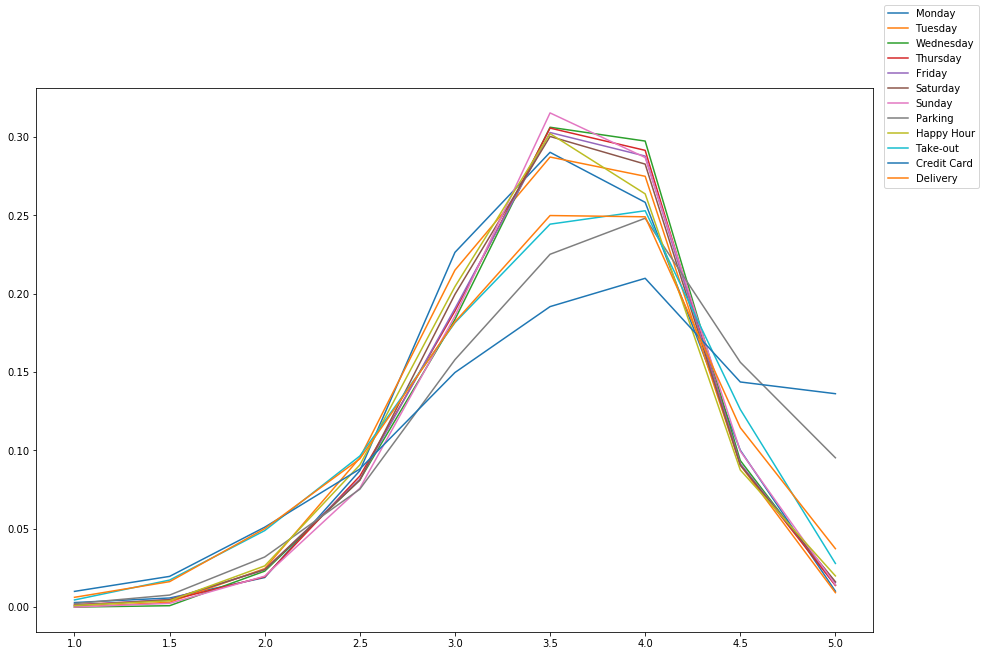

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(pd.crosstab(columns=business_df.best_mon,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Monday")
ax.plot(pd.crosstab(columns=business_df.best_tue,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Tuesday")
ax.plot(pd.crosstab(columns=business_df.best_wed,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Wednesday")
ax.plot(pd.crosstab(columns=business_df.best_thur,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Thursday")
ax.plot(pd.crosstab(columns=business_df.best_friday,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Friday")
ax.plot(pd.crosstab(columns=business_df.best_sat,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Saturday")
ax.plot(pd.crosstab(columns=business_df.best_sunday,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Sunday")
ax.plot(pd.crosstab(columns=business_df.parking,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Parking")
ax.plot(pd.crosstab(columns=business_df.happyhour,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Happy Hour")
ax.plot(pd.crosstab(columns=business_df.takeout,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Take-out")
ax.plot(pd.crosstab(columns=business_df.credit_card,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Credit Card")
ax.plot(pd.crosstab(columns=business_df.delivery,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="Delivery")

fig.legend(loc='upper right')
plt.show()

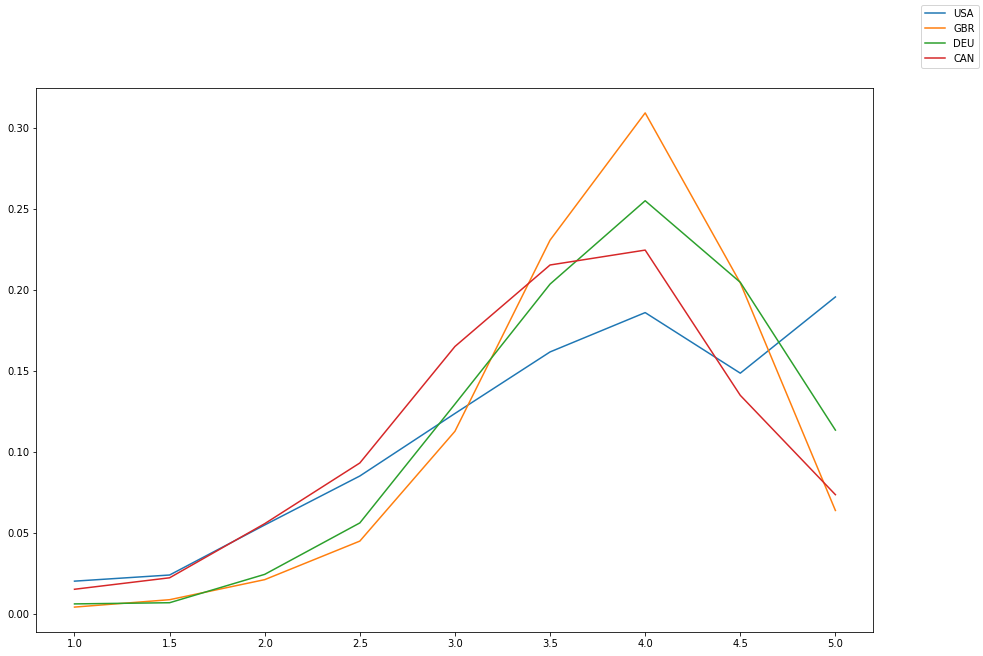

In [18]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(pd.crosstab(columns=business_df[business_df.country == "USA"].is_open,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="USA")
ax.plot(pd.crosstab(columns=business_df[business_df.country == "GBR"].is_open,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="GBR")
ax.plot(pd.crosstab(columns=business_df[business_df.country == "DEU"].is_open,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="DEU")
ax.plot(pd.crosstab(columns=business_df[business_df.country == "CAN"].is_open,index=business_df.stars).apply(lambda r: r/r.sum(), axis=0)[1],
             label="CAN")
fig.legend(loc='upper right')
plt.show()

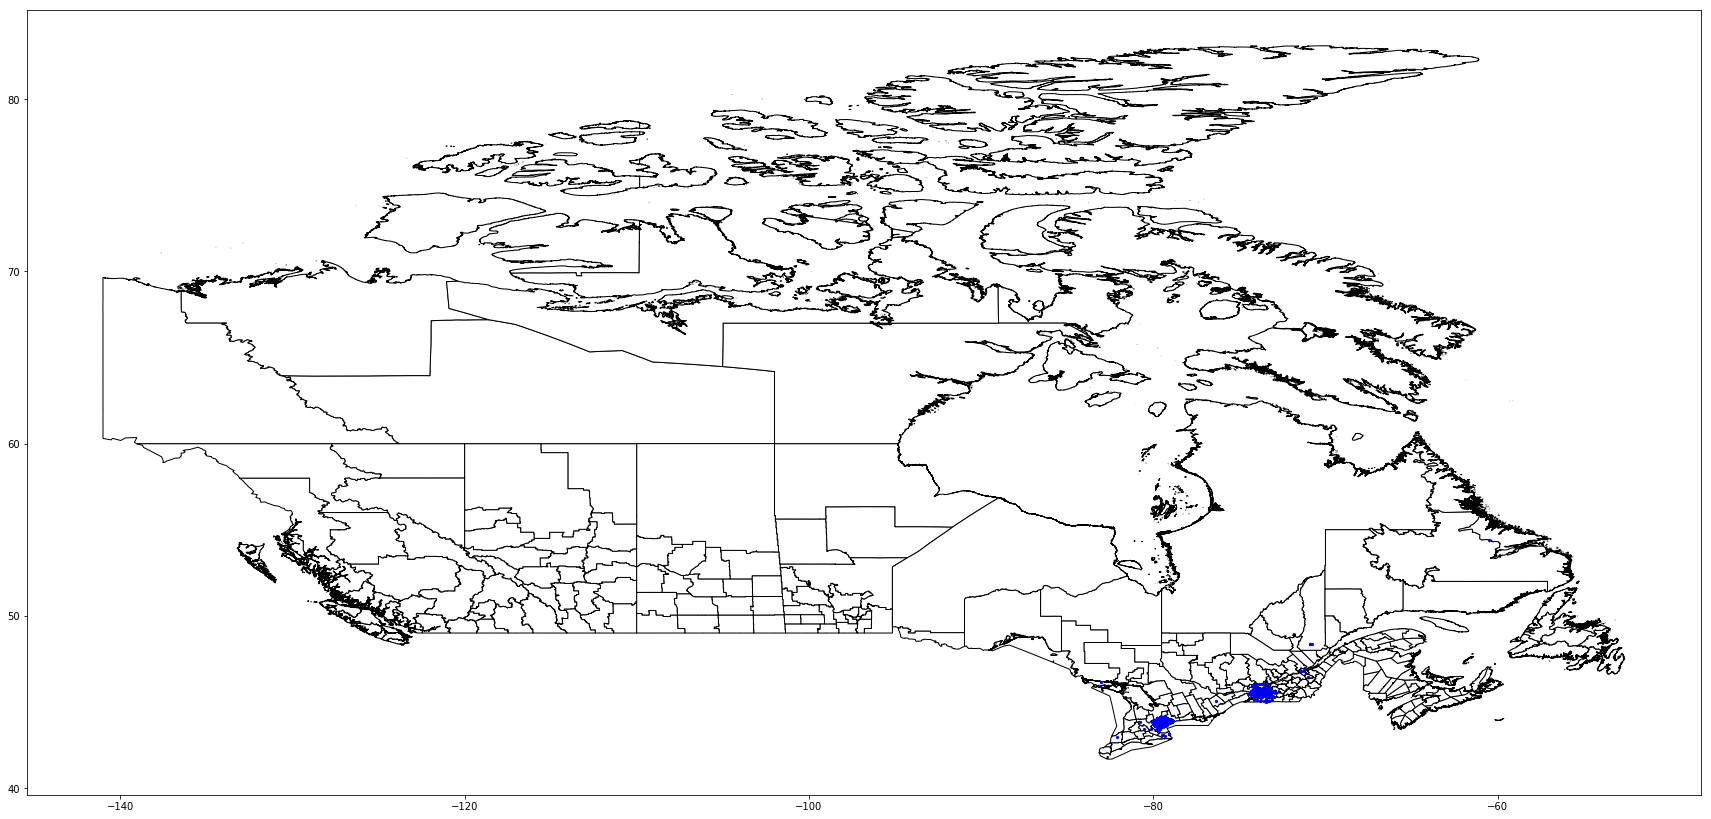

In [19]:
# check some detailed shapefile
can_map = gpd.read_file("CAN_adm_shp/CAN_adm2.shp")
can_yelp = business_df[business_df["country"]=="CAN"]
can_yelp = gpd.GeoDataFrame(can_yelp[["business_id"]],crs=crs, geometry=can_yelp["geometry"])
can_yelp = can_yelp.to_crs(can_map.crs)
fig, ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')
can_map.plot(ax=ax,color='white', edgecolor='black')
can_yelp.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()

In [20]:
merging_can = gpd.sjoin(can_yelp,can_map,how="left", op="within")
merging_can.drop(["geometry","index_right","ID_0","ISO","NAME_0","ID_1","ID_2","HASC_2","CCN_2","CCA_2",
                  "TYPE_2","ENGTYPE_2","NL_NAME_2","VARNAME_2"],axis=1,inplace=True)
merging_can.rename(columns={"NAME_1":"state","NAME_2":"city"},inplace=True)
merging_can = merging_can[(merging_can.state=="Ontario")|(merging_can.state=="Québec")]
pd.crosstab(index=merging_can.city,columns=merging_can.state)

state,Ontario,Québec
city,,
Algoma,1,0
Argenteuil,0,2
Beauharnois-Salaberry,0,5
Brome-Missisquoi,0,2
Champlain,0,192
Communauté-Urbaine-de-Montréal,0,6279
Communauté-Urbaine-de-Québec,0,3
D'Autray,0,1
Deux-Montagnes,0,15


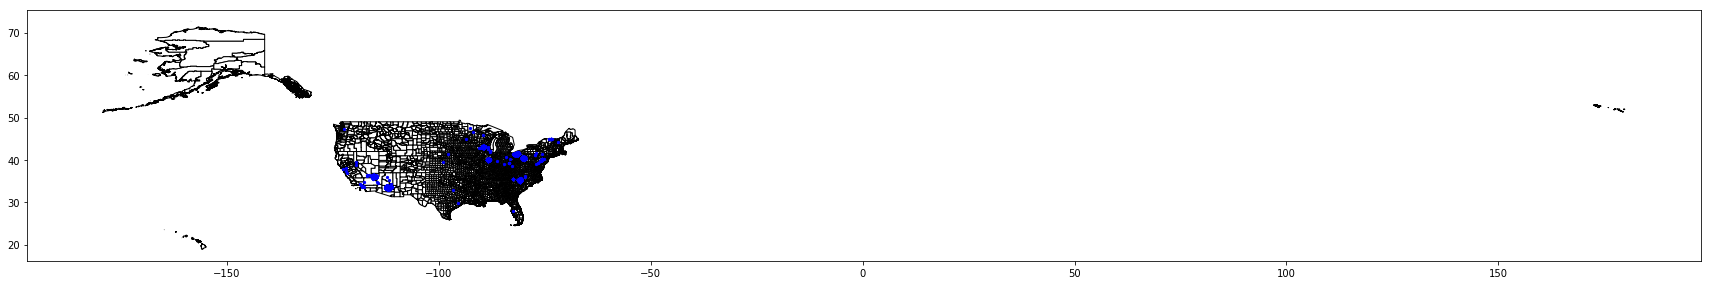

In [21]:
usa_map = gpd.read_file("USA_adm/USA_adm2.shp")
usa_yelp = business_df[business_df["country"]=="USA"]
usa_yelp = gpd.GeoDataFrame(usa_yelp[["business_id"]],crs=crs, geometry=usa_yelp["geometry"])
usa_yelp = usa_yelp.to_crs(usa_map.crs)
fig, ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')
usa_map.plot(ax=ax,color='white', edgecolor='black')
usa_yelp.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()

In [22]:
merging_usa = gpd.sjoin(usa_yelp,usa_map,how="left", op="within")
merging_usa.drop(["geometry","index_right","ID_0","ISO","NAME_0","ID_1","ID_2","TYPE_2","ENGTYPE_2",
                  "NL_NAME_2","VARNAME_2"],axis=1,inplace=True)
merging_usa.rename(columns={"NAME_1":"state","NAME_2":"city"},inplace=True)
merging_usa = merging_usa[(merging_usa.state=="Arizona")|(merging_usa.state=="Illinois")|
                          (merging_usa.state=="Nevada")|(merging_usa.state=="North Carolina")|
                         (merging_usa.state=="Ohio")|(merging_usa.state=="Pennsylvania")|
                         (merging_usa.state=="South Carolina")|(merging_usa.state=="Wisconsin")]
pd.crosstab(index=merging_usa.city,columns=merging_usa.state)

state,Arizona,Illinois,Nevada,North Carolina,Ohio,Pennsylvania,South Carolina,Wisconsin
city,,,,,,,,
Alamance,0,0,0,1,0,0,0,0
Allegheny,0,0,0,0,0,8235,0,0
Allen,0,0,0,0,1,0,0,0
Beaver,0,0,0,0,0,31,0,0
Bucks,0,0,0,0,0,1,0,0
Buncombe,0,0,0,20,0,0,0,0
Butler,0,0,0,0,0,2,0,0
Cabarrus,0,0,0,874,0,0,0,0
Champaign,0,1606,0,0,0,0,0,0


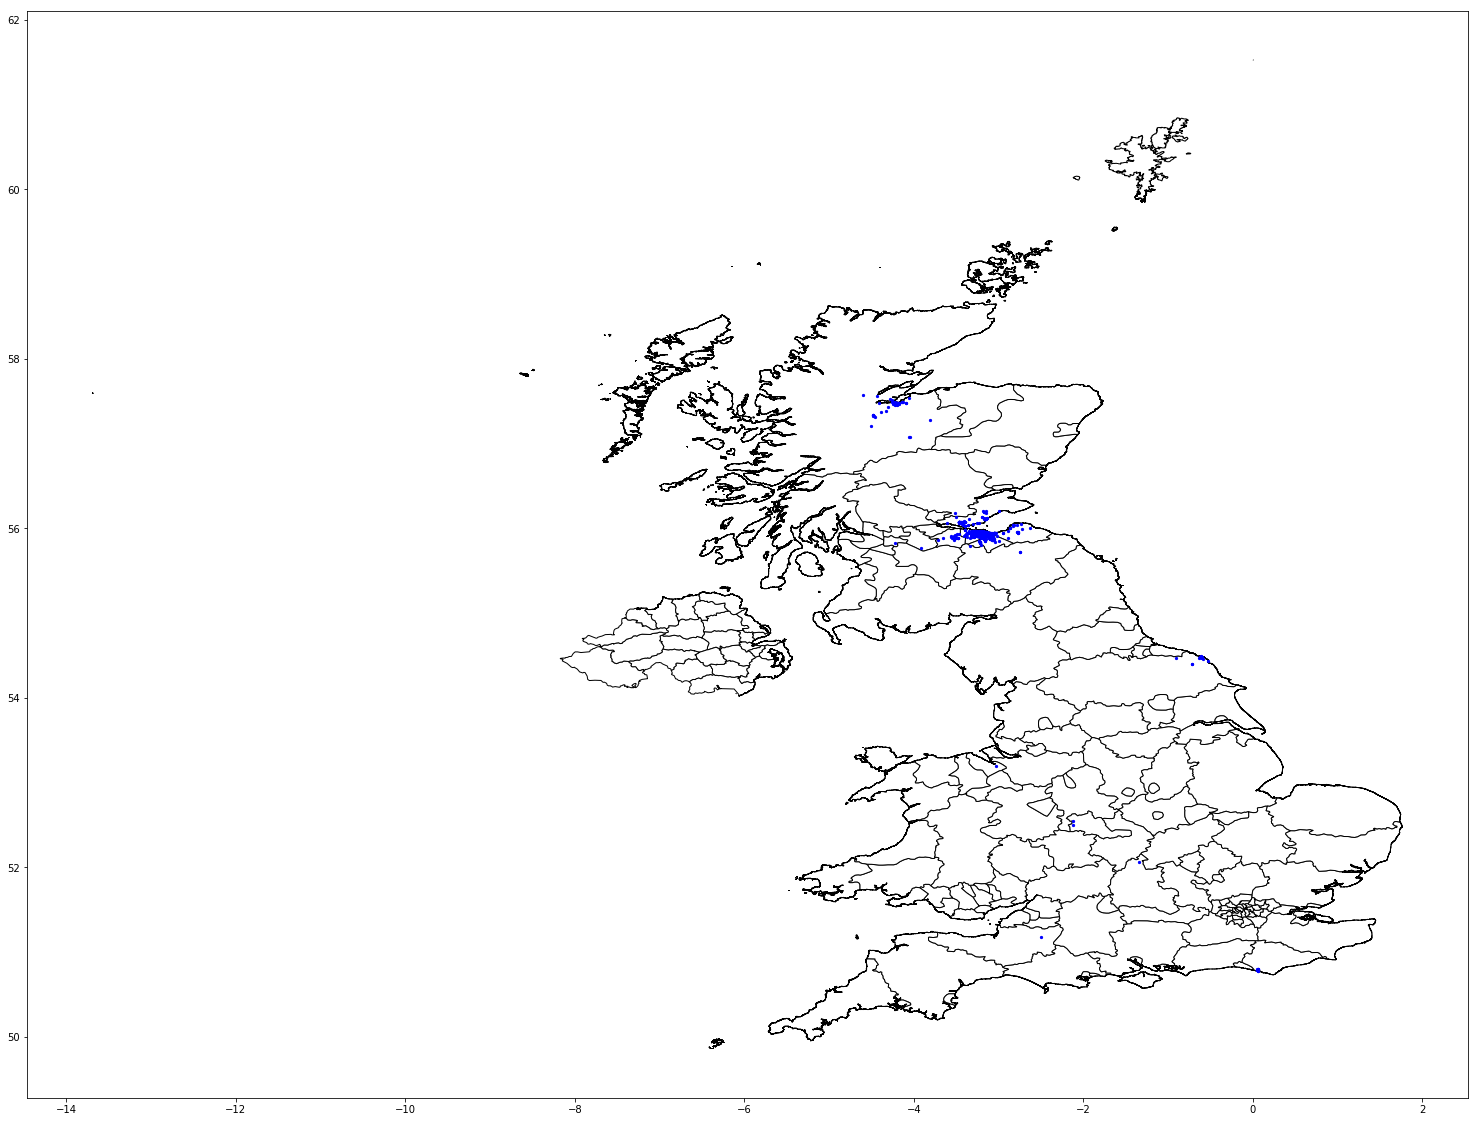

In [23]:
gbr_map = gpd.read_file("GBR_adm_shp/GBR_adm2.shp")
gbr_yelp = business_df[business_df["country"]=="GBR"]
gbr_yelp = gpd.GeoDataFrame(gbr_yelp[["business_id"]],crs=crs, geometry=gbr_yelp["geometry"])
gbr_yelp = gbr_yelp.to_crs(gbr_map.crs)
fig, ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')
gbr_map.plot(ax=ax,color='white', edgecolor='black')
gbr_yelp.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()

In [24]:
merging_gbr = gpd.sjoin(gbr_yelp,gbr_map,how="left", op="within")
merging_gbr.drop(["geometry","index_right","ID_0","ISO","NAME_0","ID_1","ID_2","HASC_2","CCN_2","CCA_2",
                  "TYPE_2","ENGTYPE_2","NL_NAME_2","VARNAME_2"],axis=1,inplace=True)
merging_gbr.rename(columns={"NAME_1":"state","NAME_2":"city"},inplace=True)
merging_gbr = merging_gbr[(merging_gbr.state=="Scotland")]
pd.crosstab(index=merging_gbr.city,columns=merging_gbr.state)

state,Scotland
city,
East Lothian,33
Edinburgh,3291
Fife,71
Glasgow,1
Highland,170
Midlothian,51
North Lanarkshire,1
Perthshire and Kinross,1
Scottish Borders,3


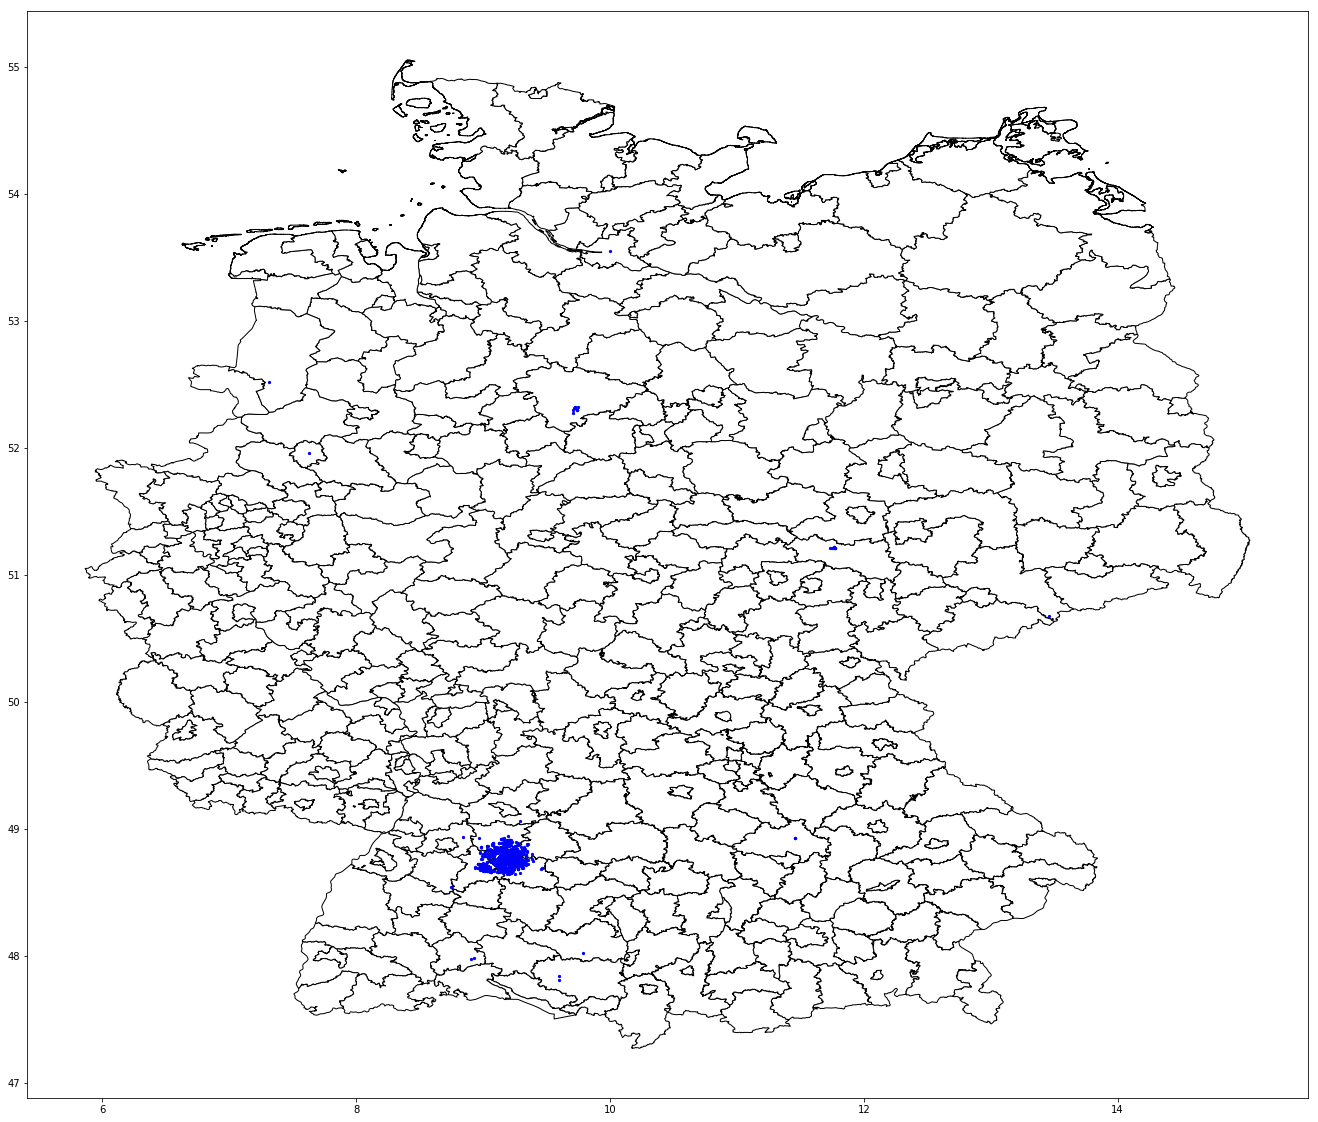

In [25]:
deu_map = gpd.read_file("DEU_adm_shp/DEU_adm2.shp")
deu_yelp = business_df[business_df["country"]=="DEU"]
deu_yelp = gpd.GeoDataFrame(deu_yelp[["business_id"]],crs=crs, geometry=deu_yelp["geometry"])
deu_yelp = deu_yelp.to_crs(deu_map.crs)
fig, ax = plt.subplots(figsize=(30,20))
ax.set_aspect('equal')
deu_map.plot(ax=ax,color='white', edgecolor='black')
deu_yelp.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()

In [26]:
merging_deu = gpd.sjoin(deu_yelp,deu_map,how="left", op="within")
merging_deu.drop(["geometry","index_right","ID_0","ISO","NAME_0","ID_1","ID_2","HASC_2","CCN_2","CCA_2",
                  "TYPE_2","ENGTYPE_2","NL_NAME_2","VARNAME_2"],axis=1,inplace=True)
merging_deu.rename(columns={"NAME_1":"state","NAME_2":"city"},inplace=True)
merging_deu = merging_deu[(merging_deu.state=="Baden-Württemberg")]
pd.crosstab(index=merging_deu.city,columns=merging_deu.state)

state,Baden-Württemberg
city,
Biberach,1
Böblingen,302
Calw,1
Enzkreis,1
Esslingen,327
Heilbronn,1
Ludwigsburg,309
Ravensburg,2
Rems-Murr-Kreis,157


In [27]:
merging = pd.concat([merging_usa,merging_can,merging_gbr,merging_deu])

In [28]:
business_df = pd.merge(business_df,merging,on="business_id")

In [29]:
business_df.head()

,best_sunday,amb_classy,parking,happyhour,hair_kid,hair_perm,takeout,amb_romantic,music_dj,best_friday,...,beauty_spa,health,home_service,local_service,prof_service,geometry,country,POP2005,state_y,city
0,999,999,1,999,999,999,999,999,999,999,...,False,False,False,False,False,POINT (-81.4931165 41.5417162),USA,299846449.0,Ohio,Cuyahoga
1,999,0,999,999,999,999,1,0,999,999,...,False,False,False,False,False,POINT (-80.74197590000001 35.23687),USA,299846449.0,North Carolina,Mecklenburg
2,999,999,0,999,999,999,999,999,999,999,...,False,False,False,False,False,POINT (-79.3532848 43.6771258),CAN,32270507.0,Ontario,Toronto
3,999,999,999,999,999,999,999,999,999,999,...,False,False,False,False,True,POINT (-111.9164003 33.5650816),USA,299846449.0,Arizona,Maricopa
4,999,0,0,999,999,999,1,0,999,999,...,False,False,False,False,False,POINT (-112.0388474 33.5059283),USA,299846449.0,Arizona,Maricopa


# Embedding the Categorical variables

In [30]:
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

In [31]:
cat_var_dict={"alcohol":2,"age_allowed":2,"smoking":2,"byob_corkage":2, "wifi":2, "attire":2, "noise": 2,
             "op_hour_thur":12, "close_hour_thur":12,"op_duration_thur":10, "op_hour_wed":12, "close_hour_wed":12,
             "op_duration_wed":10, "op_hour_sun":12, "close_hour_sun":12, "op_duration_sun":10,
             "op_hour_fri":12, "close_hour_fri":12, "op_duration_fri":10, "op_hour_tue":12,"close_hour_tue":12,
             "op_duration_tue":10,"op_hour_mon":12,"close_hour_mon":12,"op_duration_mon":10,"op_hour_sat":12,
             "close_hour_sat":12,"op_duration_sat":10,"country":2,"state_y":5,"city":10}
cat_vars = [o[0] for o in sorted(cat_var_dict.items(),key=operator.itemgetter(1),reverse=True)]

In [32]:
df_clean=business_df.drop(["latitude","longitude","state_x","geometry","name","business_id",
                          "review_count","stars","is_open",'POP2005'],axis=1)
for i in list(df_clean):
    print("name: "+i)
    print(df_clean[i].unique())

name: best_sunday
[999   0   1]
name: amb_classy
[999   0   1]
name: parking
[  1 999   0]
name: happyhour
[999   1   0]
name: hair_kid
[999   0   1]
name: hair_perm
[999   0   1]
name: takeout
[999   1   0]
name: amb_romantic
[999   0   1]
name: music_dj
[999   0   1]
name: best_friday
[999   0   1]
name: outdoor_seat
[999   0   1]
name: good_dinner
[999   0   1]
name: park_valet
[  0 999   1]
name: credit_card
[999   0   1]
name: alcohol
['' "b'none'" "b'full_bar'" "b'beer_and_wine'"]
name: appointment
[999   1   0]
name: age_allowed
['' "b'allages'" "b'18plus'" "b'21plus'" "b'19plus'"]
name: music_video
[999   0   1]
name: tv
[999   0   1]
name: best_mon
[999   0   1]
name: delivery
[999   1   0]
name: amb_divey
[999   0   1]
name: music_live
[999   0   1]
name: amb_tourist
[999   0   1]
name: good_lunch
[999   0   1]
name: price_range
[2 0 1 3 4]
name: music_background
[999   0   1]
name: good_kid
[999   1   0]
name: dairy_free
[999   0   1]
name: hair_curly
[999   0   1]
name: whe

name: food
[False  True]
name: food_us
[False  True]
name: food_europe
[False  True]
name: food_mexican
[False  True]
name: food_chinese
[False  True]
name: food_jpn
[False  True]
name: food_asian
[False  True]
name: food_coffee
[False  True]
name: food_seafood
[False  True]
name: food_ethnic
[False  True]
name: food_health
[False  True]
name: bar
[False  True]
name: hotel
[False  True]
name: grocery
[False  True]
name: shopping
[ True False]
name: pet
[False  True]
name: hair_salon
[False  True]
name: beauty_spa
[False  True]
name: health
[False  True]
name: home_service
[False  True]
name: local_service
[False  True]
name: prof_service
[False  True]
name: country
['USA' 'CAN' 'GBR' 'DEU']
name: state_y
['Ohio' 'North Carolina' 'Ontario' 'Arizona' 'Pennsylvania' 'Nevada'
 'Scotland' 'Québec' 'Wisconsin' 'Illinois' 'Baden-Württemberg'
 'South Carolina']
name: city
['Cuyahoga' 'Mecklenburg' 'Toronto' 'Maricopa' 'Allegheny' 'Washington'
 'Clark' 'Gaston' 'Peel' 'Edinburgh' 'Communauté-Ur

In [33]:
list(df_clean.columns)

['best_sunday',
 'amb_classy',
 'parking',
 'happyhour',
 'hair_kid',
 'hair_perm',
 'takeout',
 'amb_romantic',
 'music_dj',
 'best_friday',
 'outdoor_seat',
 'good_dinner',
 'park_valet',
 'credit_card',
 'alcohol',
 'appointment',
 'age_allowed',
 'music_video',
 'tv',
 'best_mon',
 'delivery',
 'amb_divey',
 'music_live',
 'amb_tourist',
 'good_lunch',
 'price_range',
 'music_background',
 'good_kid',
 'dairy_free',
 'hair_curly',
 'wheelchair',
 'music_jukebox',
 'soy_free',
 'insurance',
 'dog_ok',
 'best_sat',
 'music_karaoke',
 'open_24hr',
 'bitcoin',
 'vegetarian',
 'smoking',
 'parking_street',
 'amb_upscale',
 'caters',
 'restaurant_counter',
 'amb_intimate',
 'parking_bike',
 'byob',
 'music_no',
 'good_breakfast',
 'amb_hipster',
 'hair_straightperm',
 'best_tue',
 'restaurant_reservation',
 'hair_coloring',
 'kosher',
 'byob_corkage',
 'parking_garage',
 'wifi',
 'best_wed',
 'parking_validated',
 'hair_extension',
 'attire',
 'coatcheck',
 'good_dessert',
 'noise',
 'ha

In [34]:
df_clean = business_df[['best_sunday', 'amb_classy', 'parking', 'happyhour', 'hair_kid', 'hair_perm', 'takeout',
             'amb_romantic', 'music_dj', 'best_friday', 'outdoor_seat', 'good_dinner', 'park_valet',
             'credit_card','appointment','music_video', 'tv', 'best_mon', 'delivery', 'amb_divey', 'music_live',
             'amb_tourist', 'good_lunch', 'price_range', 'music_background', 'good_kid', 'dairy_free',
             'hair_curly', 'wheelchair', 'music_jukebox', 'soy_free', 'insurance', 'dog_ok', 'best_sat',
             'music_karaoke', 'open_24hr', 'bitcoin', 'vegetarian','parking_street', 'amb_upscale', 'caters',
             'restaurant_counter', 'amb_intimate', 'parking_bike', 'byob', 'music_no', 'good_breakfast',
             'amb_hipster', 'hair_straightperm', 'best_tue', 'restaurant_reservation', 'hair_coloring',
             'kosher','parking_garage','best_wed', 'parking_validated', 'hair_extension','coatcheck',
             'good_dessert','halal', 'glutten_free', 'drivethru', 'hair_asian', 'table_service', 'restaurant_group',
             'amb_trendy', 'vegan', 'amb_casual', 'corkage', 'good_latenight', 'hair_african', 'good_brunch',
             'good_dancing', 'best_thur','food', 'food_us', 'food_europe', 'food_mexican', 'food_chinese',
             'food_jpn', 'food_asian', 'food_coffee', 'food_seafood', 'food_ethnic', 'food_health', 'bar',
             'hotel', 'grocery', 'shopping', 'pet', 'hair_salon', 'beauty_spa', 'health', 'home_service',
             'local_service', 'prof_service',
             "alcohol","age_allowed","smoking","byob_corkage", "wifi", "attire", "noise","op_hour_thur", 
             "close_hour_thur","op_duration_thur", "op_hour_wed", "close_hour_wed","op_duration_wed",
             "op_hour_sun", "close_hour_sun", "op_duration_sun","op_hour_fri", "close_hour_fri", 
             "op_duration_fri", "op_hour_tue","close_hour_tue","op_duration_tue","op_hour_mon","close_hour_mon",
             "op_duration_mon","op_hour_sat","close_hour_sat","op_duration_sat","country","state_y","city",]]

In [35]:
cont_vars = ['best_sunday', 'amb_classy', 'parking', 'happyhour', 'hair_kid', 'hair_perm', 'takeout',
             'amb_romantic', 'music_dj', 'best_friday', 'outdoor_seat', 'good_dinner', 'park_valet',
             'credit_card','appointment','music_video', 'tv', 'best_mon', 'delivery', 'amb_divey', 'music_live',
             'amb_tourist', 'good_lunch', 'price_range', 'music_background', 'good_kid', 'dairy_free',
             'hair_curly', 'wheelchair', 'music_jukebox', 'soy_free', 'insurance', 'dog_ok', 'best_sat',
             'music_karaoke', 'open_24hr', 'bitcoin', 'vegetarian','parking_street', 'amb_upscale', 'caters',
             'restaurant_counter', 'amb_intimate', 'parking_bike', 'byob', 'music_no', 'good_breakfast',
             'amb_hipster', 'hair_straightperm', 'best_tue', 'restaurant_reservation', 'hair_coloring',
             'kosher','parking_garage','best_wed', 'parking_validated', 'hair_extension','coatcheck',
             'good_dessert','halal', 'glutten_free', 'drivethru', 'hair_asian', 'table_service', 'restaurant_group',
             'amb_trendy', 'vegan', 'amb_casual', 'corkage', 'good_latenight', 'hair_african', 'good_brunch',
             'good_dancing', 'best_thur','food', 'food_us', 'food_europe', 'food_mexican', 'food_chinese',
             'food_jpn', 'food_asian', 'food_coffee', 'food_seafood', 'food_ethnic', 'food_health', 'bar',
             'hotel', 'grocery', 'shopping', 'pet', 'hair_salon', 'beauty_spa', 'health', 'home_service',
             'local_service', 'prof_service']
len(cont_vars)

96

In [36]:
df_clean

,best_sunday,amb_classy,parking,happyhour,hair_kid,hair_perm,takeout,amb_romantic,music_dj,best_friday,...,op_duration_tue,op_hour_mon,close_hour_mon,op_duration_mon,op_hour_sat,close_hour_sat,op_duration_sat,country,state_y,city
0,999,999,1,999,999,999,999,999,999,999,...,11:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,11:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,11:00:00,USA,Ohio,Cuyahoga
1,999,0,999,999,999,999,1,0,999,999,...,12:00:00,1900-01-01 10:00:00,1900-01-01 22:00:00,12:00:00,1900-01-01 10:00:00,1900-01-01 22:00:00,12:00:00,USA,North Carolina,Mecklenburg
2,999,999,0,999,999,999,999,999,999,999,...,09:00:00,1900-01-01 10:00:00,1900-01-01 19:00:00,09:00:00,1900-01-01 10:00:00,1900-01-01 18:00:00,08:00:00,CAN,Ontario,Toronto
3,999,999,999,999,999,999,999,999,999,999,...,08:00:00,1900-01-01 09:00:00,1900-01-01 17:00:00,08:00:00,1900-01-01 01:00:00,1900-01-01 01:00:00,00:00:00,USA,Arizona,Maricopa
4,999,0,0,999,999,999,1,0,999,999,...,00:00:00,1900-01-01 01:00:00,1900-01-01 01:00:00,00:00:00,1900-01-01 01:00:00,1900-01-01 01:00:00,00:00:00,USA,Arizona,Maricopa
5,999,999,1,999,999,999,999,999,999,999,...,10:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,10:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,11:00:00,USA,Arizona,Maricopa
6,999,999,999,999,999,999,999,999,999,999,...,05:00:00,1900-01-01 14:30:00,1900-01-01 17:00:00,02:30:00,1900-01-01 01:00:00,1900-01-01 01:00:00,00:00:00,USA,Arizona,Maricopa
7,999,999,999,999,999,999,999,999,999,999,...,09:00:00,1900-01-01 08:00:00,1900-01-01 17:00:00,09:00:00,1900-01-01 08:00:00,1900-01-01 17:00:00,09:00:00,USA,Pennsylvania,Allegheny
8,999,999,1,999,999,999,999,999,999,999,...,08:00:00,1900-01-01 10:00:00,1900-01-01 18:00:00,08:00:00,1900-01-01 10:00:00,1900-01-01 16:00:00,06:00:00,USA,Pennsylvania,Washington
9,999,999,999,999,999,999,999,999,999,999,...,09:30:00,1900-01-01 07:30:00,1900-01-01 17:00:00,09:30:00,1900-01-01 01:00:00,1900-01-01 01:00:00,00:00:00,USA,Arizona,Maricopa


In [37]:
cat_maps = [(o,LabelEncoder()) for o in cat_vars]
cat_mapper = DataFrameMapper(cat_maps)
cat_map_fit = cat_mapper.fit(df_clean)
cat_cols = len(cat_map_fit.features)

In [38]:
def cat_preproc(dat):
    return cat_map_fit.transform(dat).astype(np.int64)

In [39]:
temp=cat_preproc(df_clean)

In [40]:
lbl=[x[0] for x in cat_map_fit.features]
temp=pd.DataFrame(temp)
temp.columns=lbl

In [41]:
temp

,close_hour_mon,op_hour_wed,close_hour_sun,op_hour_thur,close_hour_thur,op_hour_tue,close_hour_sat,op_hour_fri,close_hour_tue,op_hour_sun,...,op_duration_mon,state_y,age_allowed,noise,country,wifi,alcohol,attire,byob_corkage,smoking
0,67,34,57,34,66,34,70,33,61,36,...,46,5,0,0,3,0,0,0,0,0
1,71,34,73,34,70,34,74,33,65,32,...,50,4,0,1,3,0,0,1,0,0
2,59,34,53,34,58,34,58,33,53,40,...,36,6,0,0,0,2,0,0,0,0
3,51,29,3,29,50,29,3,28,45,3,...,32,0,0,0,3,0,0,0,0,0
4,3,2,3,2,3,2,3,2,3,3,...,0,0,0,3,3,2,3,1,0,0
5,63,34,61,34,62,34,70,33,57,32,...,42,0,0,0,3,0,0,0,0,0
6,51,51,3,49,58,49,3,28,53,3,...,9,0,0,0,3,0,0,0,0,0
7,51,25,51,25,50,25,54,24,45,23,...,36,7,0,0,3,0,0,0,0,0
8,55,34,3,34,62,34,50,33,49,3,...,32,7,0,0,3,0,0,0,0,0
9,51,22,3,22,50,22,3,22,45,3,...,39,0,0,0,3,0,0,0,0,0


In [42]:
#df_clean.drop(lbl,axis=1,inplace=True)

/home/an/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_clean

,best_sunday,amb_classy,parking,happyhour,hair_kid,hair_perm,takeout,amb_romantic,music_dj,best_friday,...,hotel,grocery,shopping,pet,hair_salon,beauty_spa,health,home_service,local_service,prof_service
0,999,999,1,999,999,999,999,999,999,999,...,False,False,True,False,False,False,False,False,False,False
1,999,0,999,999,999,999,1,0,999,999,...,False,False,False,False,False,False,False,False,False,False
2,999,999,0,999,999,999,999,999,999,999,...,False,False,False,False,False,False,False,False,False,False
3,999,999,999,999,999,999,999,999,999,999,...,False,False,False,False,False,False,False,False,False,True
4,999,0,0,999,999,999,1,0,999,999,...,False,False,False,False,False,False,False,False,False,False
5,999,999,1,999,999,999,999,999,999,999,...,False,False,True,False,False,False,False,False,False,False
6,999,999,999,999,999,999,999,999,999,999,...,False,False,False,False,False,False,True,False,False,False
7,999,999,999,999,999,999,999,999,999,999,...,False,False,False,False,False,False,False,False,False,False
8,999,999,1,999,999,999,999,999,999,999,...,False,False,True,False,False,False,False,False,True,False
9,999,999,999,999,999,999,999,999,999,999,...,False,False,False,False,False,False,True,False,False,False


In [44]:
df_clean.drop(lbl,axis=1,inplace=True)
df_clean=df_clean.join(temp)

In [45]:
df_clean.head()

,best_sunday,amb_classy,parking,happyhour,hair_kid,hair_perm,takeout,amb_romantic,music_dj,best_friday,...,op_duration_mon,state_y,age_allowed,noise,country,wifi,alcohol,attire,byob_corkage,smoking
0,999,999,1,999,999,999,999,999,999,999,...,46,5,0,0,3,0,0,0,0,0
1,999,0,999,999,999,999,1,0,999,999,...,50,4,0,1,3,0,0,1,0,0
2,999,999,0,999,999,999,999,999,999,999,...,36,6,0,0,0,2,0,0,0,0
3,999,999,999,999,999,999,999,999,999,999,...,32,0,0,0,3,0,0,0,0,0
4,999,0,0,999,999,999,1,0,999,999,...,0,0,0,3,3,2,3,1,0,0


In [46]:
train_ratio=0.9
samp_size=df_clean.shape[0]
train_size = int(train_ratio*samp_size)
df_valid = df_clean[train_size:]
df_train = df_clean[:train_size]

In [47]:
m_log_star = np.max(np.log(business_df.stars))
star_valid = np.log(business_df.stars[train_size:])/m_log_star
star_train = np.log(business_df.stars[:train_size])/m_log_star

In [48]:
op_valid = business_df.is_open[train_size:]
op_train = business_df.is_open[:train_size]

# XGBoost

In [49]:
all_vars = list(df_clean.columns)
xgb_parms = {'learning_rate': 0.5, 'subsample': 0.6, 
             'colsample_bylevel': 0.6, 'silent': True, 'objective': 'reg:linear'}
xdata = xgboost.DMatrix(df_train, star_train, feature_names=all_vars)
xdata_val = xgboost.DMatrix(df_valid, star_valid, feature_names=all_vars)
xgb_parms['seed'] = random.randint(0,1e9)
model = xgboost.train(xgb_parms, xdata)

In [50]:
model.eval(xdata_val)

b'[0]\teval-rmse:0.184961'

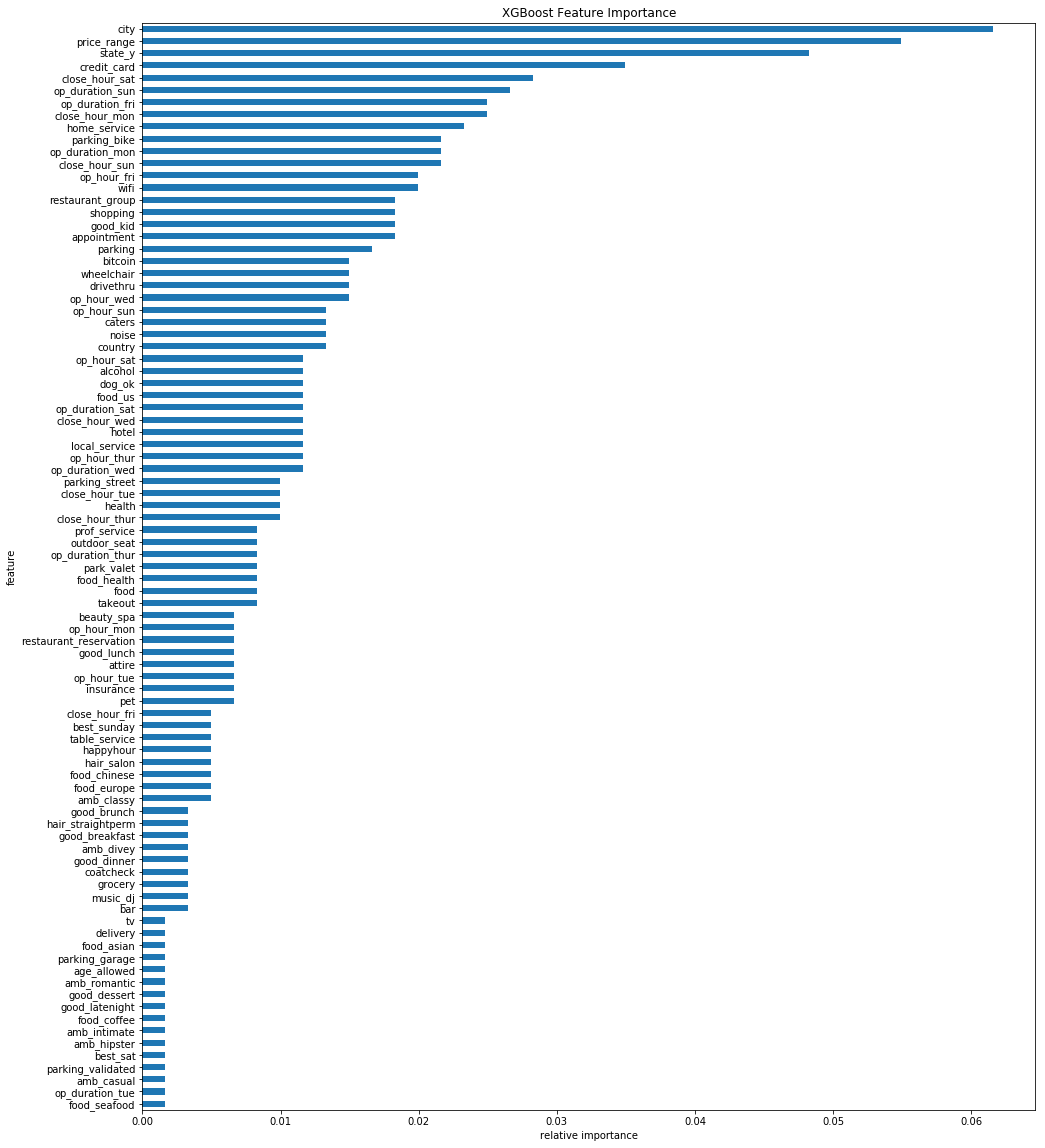

In [51]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

In [52]:
all_vars = list(df_clean.columns)
xgb_parms = {'learning_rate': 0.3, 'subsample': 0.6, 
             'colsample_bylevel': 0.6, 'silent': True, 'objective': 'reg:linear'}
xdata = xgboost.DMatrix(df_train, op_train, feature_names=all_vars)
xdata_val = xgboost.DMatrix(df_valid, op_valid, feature_names=all_vars)
xgb_parms['seed'] = random.randint(0,1e9)
model = xgboost.train(xgb_parms, xdata)
model.eval(xdata_val)

b'[0]\teval-rmse:0.305648'

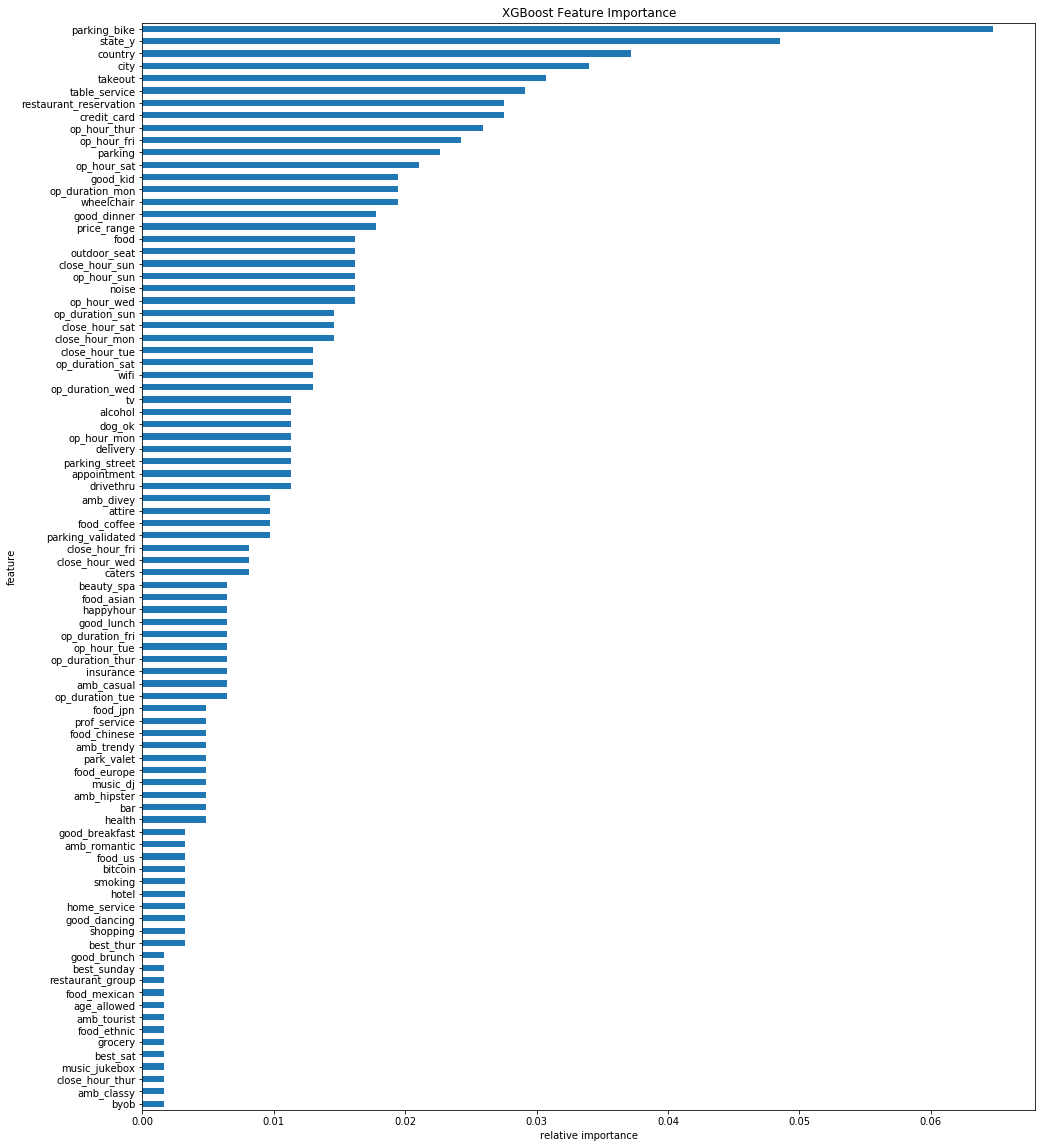

In [53]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

# Model

In [254]:
## Keras needs a numpy array as input

df_clean = business_df[['best_sunday', 'amb_classy', 'parking', 'happyhour', 'hair_kid', 'hair_perm', 'takeout',
             'amb_romantic', 'music_dj', 'best_friday', 'outdoor_seat', 'good_dinner', 'park_valet',
             'credit_card','appointment','music_video', 'tv', 'best_mon', 'delivery', 'amb_divey', 'music_live',
             'amb_tourist', 'good_lunch', 'price_range', 'music_background', 'good_kid', 'dairy_free',
             'hair_curly', 'wheelchair', 'music_jukebox', 'soy_free', 'insurance', 'dog_ok', 'best_sat',
             'music_karaoke', 'open_24hr', 'bitcoin', 'vegetarian','parking_street', 'amb_upscale', 'caters',
             'restaurant_counter', 'amb_intimate', 'parking_bike', 'byob', 'music_no', 'good_breakfast',
             'amb_hipster', 'hair_straightperm', 'best_tue', 'restaurant_reservation', 'hair_coloring',
             'kosher','parking_garage','best_wed', 'parking_validated', 'hair_extension','coatcheck',
             'good_dessert','halal', 'glutten_free', 'drivethru', 'hair_asian', 'table_service', 'restaurant_group',
             'amb_trendy', 'vegan', 'amb_casual', 'corkage', 'good_latenight', 'hair_african', 'good_brunch',
             'good_dancing', 'best_thur','food', 'food_us', 'food_europe', 'food_mexican', 'food_chinese',
             'food_jpn', 'food_asian', 'food_coffee', 'food_seafood', 'food_ethnic', 'food_health', 'bar',
             'hotel', 'grocery', 'shopping', 'pet', 'hair_salon', 'beauty_spa', 'health', 'home_service',
             'local_service', 'prof_service',
             "alcohol","age_allowed","smoking","byob_corkage", "wifi", "attire", "noise","op_hour_thur", 
             "close_hour_thur","op_duration_thur", "op_hour_wed", "close_hour_wed","op_duration_wed",
             "op_hour_sun", "close_hour_sun", "op_duration_sun","op_hour_fri", "close_hour_fri", 
             "op_duration_fri", "op_hour_tue","close_hour_tue","op_duration_tue","op_hour_mon","close_hour_mon",
             "op_duration_mon","op_hour_sat","close_hour_sat","op_duration_sat","country","state_y","city",]]
df_clean=df_clean[:1000]
train_ratio=0.8
samp_size=df_clean.shape[0]
train_size = int(train_ratio*samp_size)
df_valid = df_clean[train_size:]
df_train = df_clean[:train_size]

cat_map_fit_train = cat_preproc(df_train)
cat_map_fit_valid = cat_preproc(df_valid)

contin_train = df_train[cont_vars].values
contin_valid = df_valid[cont_vars].values

def split_cols(arr): return np.hsplit(arr,arr.shape[1])

map_train = split_cols(cat_map_fit_train) + [contin_train]
map_valid = split_cols(cat_map_fit_valid) + [contin_valid]

bus_df = business_df[:1000]
star_valid = np.log(bus_df.stars[train_size:])/m_log_star
star_train = np.log(bus_df.stars[:train_size])/m_log_star

In [282]:
def cat_map_info(feat): return feat[0], len(feat[1].classes_)

def my_init(shape, dtype=None):
    return K.random_uniform(shape)
def emb_init(shape, dtype=None): 
    return K.random_uniform(shape)

def get_emb(feat):
    name, c = cat_map_info(feat)
    #c2 = cat_var_dict[name]
    c2 = (c+1)//2
    if c2>50: c2=50
    inp = Input((1,), dtype='int64', name=name+'_in')
    u = Flatten(name=name+'_flt')(Embedding(c, c2, input_length=1, embeddings_initializer=emb_init)(inp))
    #inp: input of the embedding, u: output of the embedding process
    return inp,u

embs = [get_emb(feat) for feat in cat_map_fit.features]

contin_inp = Input((contin_cols,), name='contin')
contin_out = Dense(contin_cols*10, activation='relu', name='contin_d')(contin_inp)

x = concatenate([emb for inp,emb in embs] + [contin_out])
#x = Dropout(0.2)(x)
#x = Dense(5000, activation='relu', kernel_initializer='uniform')(x)
#x = Dense(1000, activation='relu', kernel_initializer='uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='uniform')(x)
#x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)
temp = [inp for inp,emb in embs]
model = Model([inp for inp,emb in embs] + [contin_inp], x)
from keras import optimizers
adam = optimizers.Adam(lr=0.01)
model.compile(optimizer=adam, loss='mean_absolute_error')

In [283]:
hist = model.fit(map_train, star_train, batch_size=20, epochs=5,
                 verbose=1, validation_data=(map_valid, star_valid))

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 3s - loss: 0.2296 - val_loss: 0.2493
Epoch 2/5
800/800 [==============================] - 1s - loss: 0.2281 - val_loss: 0.2493
Epoch 3/5
800/800 [==============================] - 1s - loss: 0.2281 - val_loss: 0.2493
Epoch 4/5
800/800 [==============================] - 1s - loss: 0.2281 - val_loss: 0.2493
Epoch 5/5
800/800 [==============================] - 1s - loss: 0.2281 - val_loss: 0.2493


In [270]:
hist.history

{'loss': [0.23740069940686226,
  0.22813369333744049,
  0.22813368588685989,
  0.22813368588685989,
  0.2281336784362793,
  0.22813368961215019,
  0.22813369333744049,
  0.22813368588685989,
  0.22813368961215019,
  0.228133674710989],
 'val_loss': [0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652,
  0.24925954639911652]}

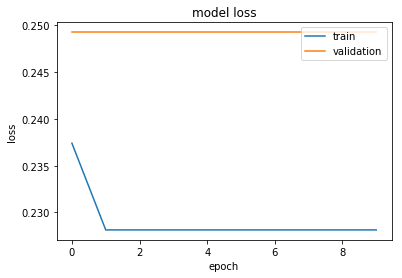

In [271]:
plot_train(hist)

In [202]:
list(map_train[31][:][1])

[999,
 0,
 999,
 999,
 999,
 999,
 1,
 0,
 999,
 999,
 0,
 0,
 999,
 0,
 999,
 999,
 0,
 999,
 1,
 0,
 999,
 0,
 0,
 2,
 999,
 1,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 0,
 999,
 999,
 0,
 999,
 999,
 999,
 0,
 0,
 999,
 999,
 0,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 0,
 999,
 999,
 999,
 999,
 999,
 1,
 0,
 999,
 0,
 999,
 0,
 999,
 0,
 999,
 999,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [267]:
adam = optimizers.Adam(lr=0.1)
model.compile(optimizer=adam, loss='mean_absolute_error')
hist = model.fit(map_train, star_train, batch_size=200, epochs=10,
                 verbose=1, validation_data=(map_valid, star_valid))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 1s - loss: 0.2281 - val_loss: 0.2493
Epoch 2/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 3/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 4/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 5/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 6/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 7/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 8/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 9/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493
Epoch 10/10
800/800 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2493


In [275]:
contin_maps = [([o], StandardScaler()) for o in cont_vars]

In [276]:
contin_mapper = DataFrameMapper(contin_maps)
contin_map_fit = contin_mapper.fit(business_df)
contin_cols = len(contin_map_fit.features)

/home/an/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/an/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [278]:
def contin_preproc(dat):
    return contin_map_fit.transform(dat).astype(np.float32)

In [279]:
df_clean = business_df[['best_sunday', 'amb_classy', 'parking', 'happyhour', 'hair_kid', 'hair_perm', 'takeout',
             'amb_romantic', 'music_dj', 'best_friday', 'outdoor_seat', 'good_dinner', 'park_valet',
             'credit_card','appointment','music_video', 'tv', 'best_mon', 'delivery', 'amb_divey', 'music_live',
             'amb_tourist', 'good_lunch', 'price_range', 'music_background', 'good_kid', 'dairy_free',
             'hair_curly', 'wheelchair', 'music_jukebox', 'soy_free', 'insurance', 'dog_ok', 'best_sat',
             'music_karaoke', 'open_24hr', 'bitcoin', 'vegetarian','parking_street', 'amb_upscale', 'caters',
             'restaurant_counter', 'amb_intimate', 'parking_bike', 'byob', 'music_no', 'good_breakfast',
             'amb_hipster', 'hair_straightperm', 'best_tue', 'restaurant_reservation', 'hair_coloring',
             'kosher','parking_garage','best_wed', 'parking_validated', 'hair_extension','coatcheck',
             'good_dessert','halal', 'glutten_free', 'drivethru', 'hair_asian', 'table_service', 'restaurant_group',
             'amb_trendy', 'vegan', 'amb_casual', 'corkage', 'good_latenight', 'hair_african', 'good_brunch',
             'good_dancing', 'best_thur','food', 'food_us', 'food_europe', 'food_mexican', 'food_chinese',
             'food_jpn', 'food_asian', 'food_coffee', 'food_seafood', 'food_ethnic', 'food_health', 'bar',
             'hotel', 'grocery', 'shopping', 'pet', 'hair_salon', 'beauty_spa', 'health', 'home_service',
             'local_service', 'prof_service',
             "alcohol","age_allowed","smoking","byob_corkage", "wifi", "attire", "noise","op_hour_thur", 
             "close_hour_thur","op_duration_thur", "op_hour_wed", "close_hour_wed","op_duration_wed",
             "op_hour_sun", "close_hour_sun", "op_duration_sun","op_hour_fri", "close_hour_fri", 
             "op_duration_fri", "op_hour_tue","close_hour_tue","op_duration_tue","op_hour_mon","close_hour_mon",
             "op_duration_mon","op_hour_sat","close_hour_sat","op_duration_sat","country","state_y","city",]]
df_clean=df_clean[:1000]
train_ratio=0.8
samp_size=df_clean.shape[0]
train_size = int(train_ratio*samp_size)
df_valid = df_clean[train_size:]
df_train = df_clean[:train_size]

cat_map_fit_train = cat_preproc(df_train)
cat_map_fit_valid = cat_preproc(df_valid)

contin_train = contin_preproc(df_train)
contin_valid = contin_preproc(df_valid)

def split_cols(arr): return np.hsplit(arr,arr.shape[1])

map_train = split_cols(cat_map_fit_train) + [contin_train]
map_valid = split_cols(cat_map_fit_valid) + [contin_valid]

bus_df = business_df[:1000]
star_valid = np.log(bus_df.stars[train_size:])/m_log_star
star_train = np.log(bus_df.stars[:train_size])/m_log_star

/home/an/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/an/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


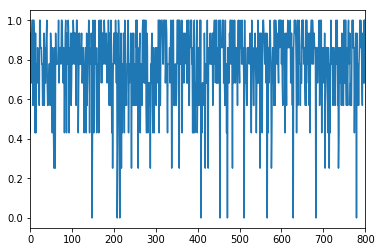

In [284]:
star_train.plot()

In [124]:
## Keras needs a numpy array as input

df_clean = business_df[['best_sunday', 'amb_classy', 'parking', 'happyhour', 'hair_kid', 'hair_perm', 'takeout',
             'amb_romantic', 'music_dj', 'best_friday', 'outdoor_seat', 'good_dinner', 'park_valet',
             'credit_card','appointment','music_video', 'tv', 'best_mon', 'delivery', 'amb_divey', 'music_live',
             'amb_tourist', 'good_lunch', 'price_range', 'music_background', 'good_kid', 'dairy_free',
             'hair_curly', 'wheelchair', 'music_jukebox', 'soy_free', 'insurance', 'dog_ok', 'best_sat',
             'music_karaoke', 'open_24hr', 'bitcoin', 'vegetarian','parking_street', 'amb_upscale', 'caters',
             'restaurant_counter', 'amb_intimate', 'parking_bike', 'byob', 'music_no', 'good_breakfast',
             'amb_hipster', 'hair_straightperm', 'best_tue', 'restaurant_reservation', 'hair_coloring',
             'kosher','parking_garage','best_wed', 'parking_validated', 'hair_extension','coatcheck',
             'good_dessert','halal', 'glutten_free', 'drivethru', 'hair_asian', 'table_service', 'restaurant_group',
             'amb_trendy', 'vegan', 'amb_casual', 'corkage', 'good_latenight', 'hair_african', 'good_brunch',
             'good_dancing', 'best_thur','food', 'food_us', 'food_europe', 'food_mexican', 'food_chinese',
             'food_jpn', 'food_asian', 'food_coffee', 'food_seafood', 'food_ethnic', 'food_health', 'bar',
             'hotel', 'grocery', 'shopping', 'pet', 'hair_salon', 'beauty_spa', 'health', 'home_service',
             'local_service', 'prof_service',
             "alcohol","age_allowed","smoking","byob_corkage", "wifi", "attire", "noise","op_hour_thur", 
             "close_hour_thur","op_duration_thur", "op_hour_wed", "close_hour_wed","op_duration_wed",
             "op_hour_sun", "close_hour_sun", "op_duration_sun","op_hour_fri", "close_hour_fri", 
             "op_duration_fri", "op_hour_tue","close_hour_tue","op_duration_tue","op_hour_mon","close_hour_mon",
             "op_duration_mon","op_hour_sat","close_hour_sat","op_duration_sat","country","state_y","city",]]
temp=cat_preproc(df_clean)
lbl=[x[0] for x in cat_map_fit.features]
temp=pd.DataFrame(temp)
temp.columns=lbl
df_clean.drop(lbl,axis=1,inplace=True)
df_clean=df_clean.join(temp)

df_clean=df_clean[:10000]
train_ratio=0.8
samp_size=df_clean.shape[0]
train_size = int(train_ratio*samp_size)
df_valid = df_clean[train_size:]
df_train = df_clean[:train_size]
map_valid = df_valid.values
map_train = df_train.values

bus_df = business_df[:10000]
star_valid = np.log(bus_df.stars[train_size:])/m_log_star
star_train = np.log(bus_df.stars[:train_size])/m_log_star

/home/an/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [138]:
model = Sequential()
model.add(Dense(64,activation="tanh",input_shape=(127,)))
model.add(Dense(32,activation="tanh"))
model.add(Dense(16,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
from keras import optimizers
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit(map_train, star_train, epochs=20, batch_size=512, validation_data=(map_valid, star_valid))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 0s - loss: 0.1633 - val_loss: 0.1477
Epoch 2/20
8000/8000 [==============================] - 0s - loss: 0.1479 - val_loss: 0.1450
Epoch 3/20
8000/8000 [==============================] - 0s - loss: 0.1468 - val_loss: 0.1444
Epoch 4/20
8000/8000 [==============================] - 0s - loss: 0.1461 - val_loss: 0.1429
Epoch 5/20
8000/8000 [==============================] - 0s - loss: 0.1465 - val_loss: 0.1454
Epoch 6/20
8000/8000 [==============================] - 0s - loss: 0.1474 - val_loss: 0.1447
Epoch 7/20
8000/8000 [==============================] - 0s - loss: 0.1462 - val_loss: 0.1442
Epoch 8/20
8000/8000 [==============================] - 0s - loss: 0.1463 - val_loss: 0.1442
Epoch 9/20
8000/8000 [==============================] - 0s - loss: 0.1466 - val_loss: 0.1448
Epoch 10/20
8000/8000 [==============================] - 0s - loss: 0.1468 - val_loss: 0.1441
Epoch 11/20
8000/8000

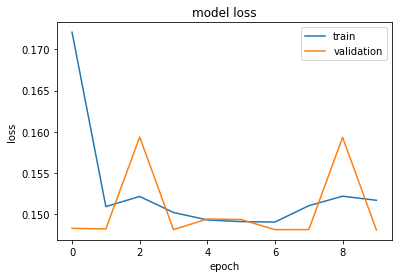

In [132]:
plot_train(history)

In [99]:
map_valid

array([[999, 999, 0, 999, 999, 999, 1, 999, 999, 999, 999, 999, 0, 1, 999,
        999, 999, 999, 999, 999, ..., 66, 64, 25, 45, 48, 38, 44, 48, 45,
        106, 46, 6, 0, 0, 0, 0, 0, 0, 0, 0],
       [999, 0, 0, 999, 999, 999, 1, 0, 999, 999, 0, 0, 0, 999, 999, 999,
        1, 999, 999, 999, ..., 70, 69, 25, 51, 54, 49, 50, 54, 51, 30, 50,
        6, 0, 1, 0, 2, 3, 1, 0, 0],
       [999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999,
        999, 0, 999, 999, 999, 999, 999, ..., 58, 56, 2, 45, 0, 0, 14, 48,
        15, 73, 46, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [999, 999, 1, 999, 999, 999, 999, 999, 999, 999, 999, 999, 0, 1,
        999, 999, 999, 999, 999, 999, ..., 58, 56, 30, 31, 20, 0, 30, 33,
        31, 75, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0],
       [999, 999, 0, 999, 999, 999, 1, 999, 999, 999, 999, 999, 0, 1, 999,
        999, 999, 999, 999, 999, ..., 74, 73, 32, 47, 50, 46, 46, 50, 47,
        24, 48, 5, 0, 0, 3, 1, 0, 0, 0, 0],
       [999, 999, 0, 999, 999, 999, 0, 

In [96]:
df_valid.shape

(200, 127)

In [70]:
temp1 = df_train[cont_vars].values.reshape((-1,800))

In [92]:
temp1[1]

array([1, 999, 999, 999, 999, 999, 0, 999, 999, 999, 999, 1, 999, 999, 999,
       999, 999, 999, 999, 999, ..., 999, 999, 999, 999, 999, 999, 999,
       999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999], dtype=object)

In [87]:
len(temp[1][0])

1

In [93]:
temp[1]

array([[34],
       [34],
       [34],
       [29],
       [ 2],
       [34],
       [51],
       [25],
       [34],
       [22],
       [ 2],
       [34],
       [11],
       [25],
       [38],
       [40],
       [19],
       [27],
       [29],
       [34],
       ..., 
       [34],
       [19],
       [38],
       [34],
       [19],
       [ 0],
       [22],
       [34],
       [34],
       [ 2],
       [29],
       [34],
       [ 2],
       [34],
       [19],
       [ 2],
       [ 2],
       [38],
       [ 2],
       [22]])